In [2]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
import scipy as sp
from scipy.io import mmread
import mpmath as mp
from scipy.optimize import minimize

In [238]:
from scipy.sparse import csr_matrix

def csr_vappend(a,b):
    """ Takes in 2 csr_matrices and appends the second one to the bottom of the first one. 
    Much faster than scipy.sparse.vstack but assumes the type to be csr and overwrites
    the first matrix instead of copying it. The data, indices, and indptr still get copied."""

    a.data = np.hstack((a.data,b.data))
    a.indices = np.hstack((a.indices,b.indices))
    a.indptr = np.hstack((a.indptr,(b.indptr + a.nnz)[1:]))
    a._shape = (a.shape[0]+b.shape[0],b.shape[1])
    return(a)
	

def stableibprnd(alpha, sigma, c, N, Jmax):
    Z = np.zeros((1, Jmax))
    m = np.zeros(Jmax) # col sums

    # First object
    
    K = int(np.random.poisson(alpha, 1))
    #print(K)
    Z[0, range(K)] = 1
    Z = csr_matrix(Z)
    m[range(K)] = 1
    for n in range(1, N):
        vec = np.zeros((1, Jmax))
        # Each object picks feature j w.p. (m_j-sigma)/(i-1 + c)
        vec[0,range(K)] = ( np.random.uniform(0, 1, K) < ((m[range(K)]-sigma)/(n  + c)) )
        # New features
        Knew = np.random.poisson((alpha * mp.gamma(1 + c) * mp.gamma(n + c + sigma)) / (mp.gamma(n + 1 + c) * mp.gamma(c + sigma)))
        if Knew>0:
            vec[0, range(K,K+Knew)] = 1
            m[range(K,K+Knew)] = 1
    # Update the counts
        m[range(K)] = m[range(K)]  + vec[0, range(K)]
        #print(Knew)

        K = K + Knew
        if n % 500 ==0:
            print(n)
        vec = csr_matrix(vec)
        csr_vappend(Z, vec)
    return(Z)

In [242]:
stableibprnd(N = 100, sigma= 0.8, c=1, alpha=1, Jmax=100000)

<100x100000 sparse matrix of type '<class 'numpy.float64'>'
	with 103 stored elements in Compressed Sparse Row format>

In [247]:
cumsum_dict={}
for i in range(5):
    test_mat = stableibprnd(N = 10000, sigma= 0.8, c=1, alpha=1, Jmax=100000)
    
    reused_words = set()
    cumsum_name = []
    for row in range(test_mat.shape[0]):
        word_indices = set(test_mat.indices[test_mat.indptr[row]:test_mat.indptr[row+1]])
        new_words = word_indices - set.intersection(word_indices, reused_words)
        if len(cumsum_name)>0:
            cumsum_name.append(cumsum_name[-1] + len(new_words))
        else:
            cumsum_name.append(len(new_words))
        reused_words.update(new_words)
    #if len(cumsum_name)<600:
        #cumsum_name = cumsum_name + [float('Nan')]*(600-len(cumsum_name))
    cumsum_dict[i] = np.array(cumsum_name) # number of cols is number of dishes


500
1000
1500
2000
2500
3000
3500
4000
4500
5000
5500
6000
6500
7000
7500
8000
8500
9000
9500
500
1000
1500
2000
2500
3000
3500
4000
4500
5000
5500
6000
6500
7000
7500
8000
8500
9000
9500
500
1000
1500
2000
2500
3000
3500
4000
4500
5000
5500
6000
6500
7000
7500
8000
8500
9000
9500
500
1000
1500
2000
2500
3000
3500
4000
4500
5000
5500
6000
6500
7000
7500
8000
8500
9000
9500
500
1000
1500
2000
2500
3000
3500
4000
4500
5000
5500
6000
6500
7000
7500
8000
8500
9000
9500


In [5]:
sigma=0.8
c=1
alpha=1
mean_vec =np.cumsum([(alpha * mp.gamma(1 + c) * mp.gamma(n + c + sigma)) / (mp.gamma(n + 1 + c) * mp.gamma(c + sigma)) for  n in range(1,1000000)])

In [6]:
sigma=0.5
mean_vec2 =np.cumsum([(alpha * mp.gamma(1 + c) * mp.gamma(n + c + sigma)) / (mp.gamma(n + 1 + c) * mp.gamma(c + sigma)) for  n in range(1,1000000)])

In [7]:
sigma=0.2
mean_vec3 =np.cumsum([(alpha * mp.gamma(1 + c) * mp.gamma(n + c + sigma)) / (mp.gamma(n + 1 + c) * mp.gamma(c + sigma)) for  n in range(1,1000000)])

In [8]:
sigma=0
mean_vec4 =np.cumsum([(alpha * mp.gamma(1 + c) * mp.gamma(n + c + sigma)) / (mp.gamma(n + 1 + c) * mp.gamma(c + sigma)) for  n in range(1,1000000)])

In [260]:
mean_vec

array([mpf('0.8999999999999998'), mpf('1.7399999999999995'),
       mpf('2.5379999999999994'), ..., mpf('84677.772486787799'),
       mpf('84677.840230873568'), mpf('84677.907974945789')], dtype=object)

No handles with labels found to put in legend.


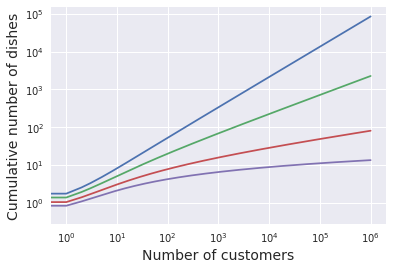

In [261]:
plt.plot(mean_vec)
plt.plot(mean_vec2)
plt.plot(mean_vec3)
plt.plot(mean_vec4)
plt.yscale("log")
plt.xscale("log")
plt.xlabel("Number of customers", size=14)
plt.ylabel("Cumulative number of dishes", size=14)
axes.set_xlim([1,1000000])
plt.legend()

In [4]:
unique_elements2, counts2 = ([0.0000e+00, 1.0000e+00, 2.0000e+00, 3.0000e+00, 4.0000e+00,
        5.0000e+00, 6.0000e+00, 7.0000e+00, 8.0000e+00, 9.0000e+00,
        1.0000e+01, 1.1000e+01, 1.2000e+01, 1.3000e+01, 1.4000e+01,
        1.5000e+01, 1.6000e+01, 1.7000e+01, 1.8000e+01, 1.9000e+01,
        2.0000e+01, 2.1000e+01, 2.2000e+01, 2.3000e+01, 2.4000e+01,
        2.5000e+01, 2.6000e+01, 2.7000e+01, 2.8000e+01, 2.9000e+01,
        3.0000e+01, 3.1000e+01, 3.2000e+01, 3.3000e+01, 3.4000e+01,
        3.5000e+01, 3.6000e+01, 3.7000e+01, 3.8000e+01, 3.9000e+01,
        4.0000e+01, 4.1000e+01, 4.2000e+01, 4.3000e+01, 4.4000e+01,
        4.5000e+01, 4.6000e+01, 4.7000e+01, 4.8000e+01, 4.9000e+01,
        5.0000e+01, 5.2000e+01, 5.5000e+01, 5.6000e+01, 5.8000e+01,
        6.0000e+01, 6.2000e+01, 6.3000e+01, 6.7000e+01, 7.0000e+01,
        7.2000e+01, 7.3000e+01, 7.4000e+01, 7.5000e+01, 7.6000e+01,
        8.1000e+01, 8.3000e+01, 8.4000e+01, 8.8000e+01, 8.9000e+01,
        9.0000e+01, 9.2000e+01, 9.3000e+01, 9.5000e+01, 9.8000e+01,
        1.0000e+02, 1.0300e+02, 1.0700e+02, 1.1200e+02, 1.1500e+02,
        1.2100e+02, 1.2600e+02, 1.2700e+02, 1.2900e+02, 1.3200e+02,
        1.3800e+02, 1.4400e+02, 1.4700e+02, 1.5200e+02, 1.5400e+02,
        1.5600e+02, 1.5800e+02, 1.5900e+02, 1.8500e+02, 1.8800e+02,
        1.9400e+02, 1.9500e+02, 2.0100e+02, 2.0700e+02, 2.1800e+02,
        2.2400e+02, 2.2800e+02, 2.5100e+02, 2.7100e+02, 2.7800e+02,
        2.8400e+02, 2.9100e+02, 3.1600e+02, 3.2700e+02, 3.3400e+02,
        3.4100e+02, 3.4300e+02, 3.4600e+02, 3.5700e+02, 3.7200e+02,
        3.9800e+02, 4.2500e+02, 4.4600e+02, 4.6200e+02, 4.6900e+02,
        5.1700e+02, 5.3100e+02, 5.6200e+02, 6.1700e+02, 6.4700e+02,
        6.9100e+02, 6.9700e+02, 7.4500e+02, 7.8000e+02, 8.6300e+02,
        1.0260e+03, 1.1980e+03, 1.3730e+03, 1.4600e+03, 1.8600e+03,
        1.9160e+03, 1.9490e+03, 2.0110e+03, 2.4720e+03, 2.5550e+03,
        2.5720e+03, 2.8220e+03, 2.8460e+03, 2.8640e+03, 2.9230e+03,
        2.9830e+03, 3.5760e+03, 5.2830e+03, 6.6530e+03, 8.6250e+03,
        8.6850e+03, 8.7440e+03, 1.2642e+04, 1.7415e+04, 1.7666e+04,
        5.0218e+04],
[98345,   800,   211,   101,    84,    58,    35,    30,    21,
           24,    10,    25,     6,     9,     5,    12,     4,     5,
            4,     3,     4,     1,     8,     2,     5,     3,     2,
            5,     3,     2,     7,     2,     2,     2,     2,     2,
            2,     1,     3,     1,     1,     2,     1,     2,     3,
            2,     2,     1,     3,     2,     3,     1,     2,     3,
            4,     1,     1,     1,     1,     3,     1,     2,     1,
            1,     1,     1,     1,     1,     1,     1,     2,     1,
            1,     1,     1,     1,     1,     2,     1,     2,     1,
            1,     1,     3,     2,     1,     1,     1,     1,     1,
            1,     1,     2,     1,     1,     1,     1,     2,     1,
            1,     2,     1,     1,     1,     2,     1,     1,     1,
            3,     1,     1,     1,     2,     1,     1,     1,     1,
            1,     1,     1,     1,     1,     1,     1,     1,     1,
            1,     1,     1,     1,     1,     1,     1,     1,     1,
            1,     1,     1,     1,     1,     1,     1,     1,     1,
            1,     1,     1,     1,     1,     1,     1,     1,     1,
            1,     1,     1])

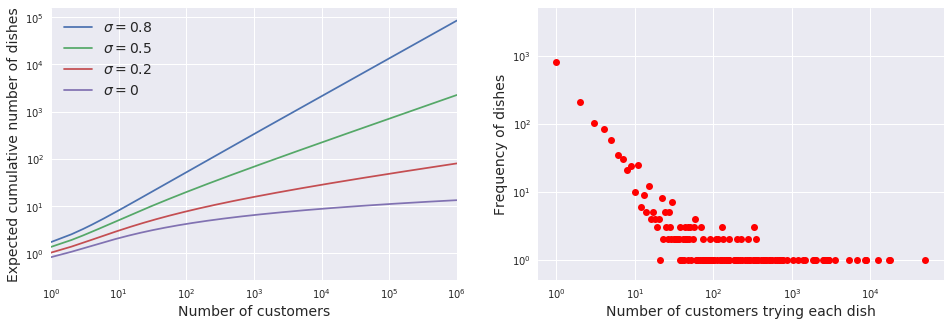

In [12]:
sns.set()
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 5))

plt.subplot(121)
plt.plot(mean_vec, label="$\sigma=0.8$")
plt.plot(mean_vec2, label="$\sigma=0.5$")
plt.plot(mean_vec3, label="$\sigma=0.2$")
plt.plot(mean_vec4, label="$\sigma=0$")
axes = plt.gca()
axes.set_xlim([1,1000000])
plt.yscale("log")
plt.xscale("log")
plt.legend(prop={'size': 14})
plt.xlabel("Number of customers", size=14)
plt.ylabel("Expected cumulative number of dishes", size=14)

plt.subplot(122)
plt.plot(unique_elements2, counts2, "ro")
axes = plt.gca()
axes.set_ylim([0.5,5000])
plt.yscale("log")
plt.xscale("log")
plt.xlabel("Number of customers trying each dish", size=14)
plt.ylabel("Frequency of dishes", size=14)
plt.show()

fig.savefig("fig11.pdf", bbox_inches='tight')